In [25]:
import os
import time
import random
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def matrix_multiply(n,A,B,C):
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] = A[i][k] * B[k][j]
sizes = [64, 128, 256, 512, 1024]

(a) System CPU Time and User CPU Time

In [4]:
# For dtype=int

sys_cpu_times_int = []
user_cpu_times_int = []

for i,size in enumerate(sizes):
    A = [[random.randint(1,10000) for i in range(size)] for j in range(size)]
    B = [[random.randint(1,10000) for i in range(size)] for j in range(size)]
    C = [[0 for i in range(size)] for j in range(size)]
    
    start_int = os.times()
    matrix_multiply(size,A,B,C)
    end_int = os.times()
    
    sys_cpu_times_int.append(end_int.system-start_int.system)
    user_cpu_times_int.append(end_int.user-start_int.user)
    
    print(f"Size: {size}x{size}")
    print(f"System CPU Time: {end_int.system-start_int.system}")
    print(f"User CPU Time: {end_int.user-start_int.user}\n")

Size: 64x64
System CPU Time: 0.015625
User CPU Time: 0.0

Size: 128x128
System CPU Time: 0.015625
User CPU Time: 0.03125

Size: 256x256
System CPU Time: 0.0
User CPU Time: 0.34375

Size: 512x512
System CPU Time: 0.015625
User CPU Time: 4.140625

Size: 1024x1024
System CPU Time: 0.109375
User CPU Time: 42.953125



In [23]:
# For dtype=double/float

sys_cpu_times_dbl = []
user_cpu_times_dbl = []

for i,size in enumerate(sizes):
    A = [[random.uniform(1,10000) for i in range(size)] for j in range(size)]
    B = [[random.uniform(1,10000) for i in range(size)] for j in range(size)]
    C = [[0 for i in range(size)] for j in range(size)]
    
    start_dbl = os.times()
    matrix_multiply(size,A,B,C)
    end_dbl = os.times()
    
    sys_cpu_times_dbl.append(end_dbl.system-start_dbl.system)
    user_cpu_times_dbl.append(end_dbl.user-start_dbl.user)
    
    print(f"Size: {size}x{size}")
    print(f"System CPU Time: {end_dbl.system-start_dbl.system}")
    print(f"User CPU Time: {end_dbl.user-start_dbl.user}\n")

Size: 64x64
System CPU Time: 0.0
User CPU Time: 0.046875

Size: 128x128
System CPU Time: 0.0
User CPU Time: 0.078125

Size: 256x256
System CPU Time: 0.03125
User CPU Time: 0.390625

Size: 512x512
System CPU Time: 0.0
User CPU Time: 3.5

Size: 1024x1024
System CPU Time: 0.046875
User CPU Time: 29.671875



(b) Meat Time and Total Execution Time

In [8]:
# For dtype=int

meat_times_int = []
total_exe_times_int = []

for i,size in enumerate(sizes):
    start = time.process_time()
    A = [[random.randint(1,10000) for i in range(size)] for j in range(size)]
    B = [[random.randint(1,10000) for i in range(size)] for j in range(size)]
    C = [[0 for i in range(size)] for j in range(size)]
    
    start_int = time.process_time()
    matrix_multiply(size,A,B,C)
    end_int = time.process_time()
    
    print(f"Size: {size}x{size}")
    print(f"Meat Time: {end_int-start_int}")
    
    end = time.process_time()
    
    meat_times_int.append(end_int-start_int)
    
    print(f"Total Execution Time: {end-start}\n")
    total_exe_times_int.append(end-start)    

Size: 64x64
Meat Time: 0.015625
Total Execution Time: 0.03125

Size: 128x128
Meat Time: 0.015625
Total Execution Time: 0.015625

Size: 256x256
Meat Time: 0.28125
Total Execution Time: 0.296875

Size: 512x512
Meat Time: 3.984375
Total Execution Time: 4.140625

Size: 1024x1024
Meat Time: 42.25
Total Execution Time: 42.671875



In [24]:
# For dtype=double/float

meat_times_dbl = []
total_exe_times_dbl = []

for i,size in enumerate(sizes):
    start = time.process_time()
    A = [[random.random() * 10000 for i in range(size)] for j in range(size)]
    B = [[random.random() * 10000 for i in range(size)] for j in range(size)]
    C = [[0 for i in range(size)] for j in range(size)]
    
    start_dbl = time.process_time()
    matrix_multiply(size,A,B,C)
    end_dbl = time.process_time()
    
    print(f"Size: {size}x{size}")
    print(f"Meat Time: {end_dbl-start_dbl}")
    
    end = time.process_time()
    
    meat_times_dbl.append(end_dbl-start_dbl)
    
    print(f"Total Execution Time: {end-start}\n")
    total_exe_times_dbl.append(end-start)    

Size: 64x64
Meat Time: 0.015625
Total Execution Time: 0.03125

Size: 128x128
Meat Time: 0.0625
Total Execution Time: 0.078125

Size: 256x256
Meat Time: 0.421875
Total Execution Time: 0.4375

Size: 512x512
Meat Time: 3.46875
Total Execution Time: 3.5

Size: 1024x1024
Meat Time: 28.375
Total Execution Time: 28.421875



Proportional Comparison

In [10]:
meat_by_total_int = [meat_times_int[i]/total_exe_times_int[i] for i in range(len(sizes))]
meat_by_total_dbl = [meat_times_dbl[i]/total_exe_times_dbl[i] for i in range(len(sizes))]

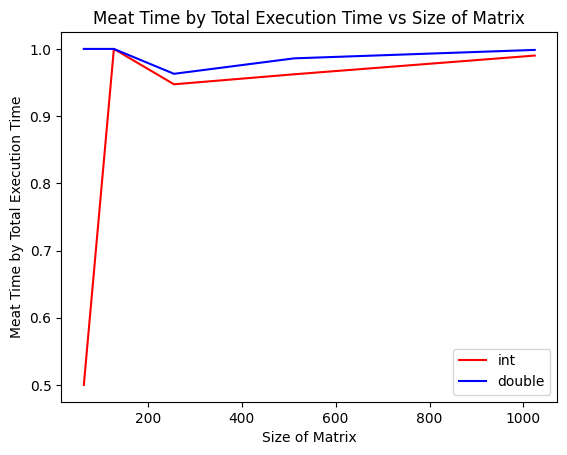

In [20]:
plt.figure()
plt.plot(sizes,meat_by_total_int,label='int',color='r')
plt.plot(sizes,meat_by_total_dbl,label='double',color='b')
plt.xlabel('Size of Matrix')
plt.ylabel('Meat Time by Total Execution Time')
plt.title('Meat Time by Total Execution Time vs Size of Matrix')
plt.legend()
plt.show()

In [26]:
data = pd.read_csv('data2.txt', sep=" ", header=None)
datapy = pd.read_csv('data2py.txt', sep=" ", header=None)

In [27]:
data.index = [64, 128, 256, 512, 1024]
datapy.index = [64, 128, 256, 512, 1024]

Ques 2. (c)

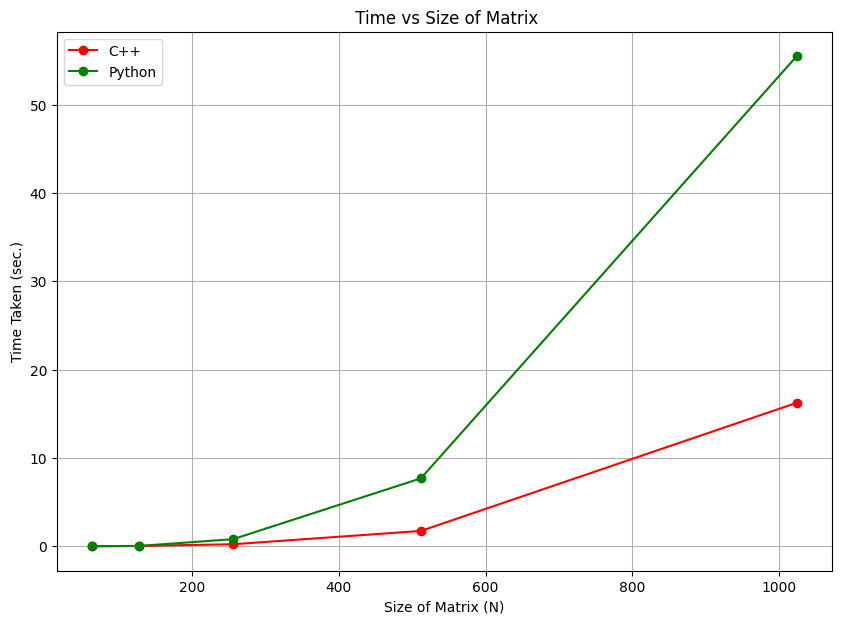

In [28]:
plt.figure(figsize=(10, 7))
plt.title(' Time vs Size of Matrix')
plt.plot(data[0], 'r-o')
plt.plot(datapy[0], 'g-o')
plt.grid()
plt.xlabel('Size of Matrix (N)')
plt.ylabel('Time Taken (sec.)')
plt.legend(['C++', 'Python'])
plt.show()

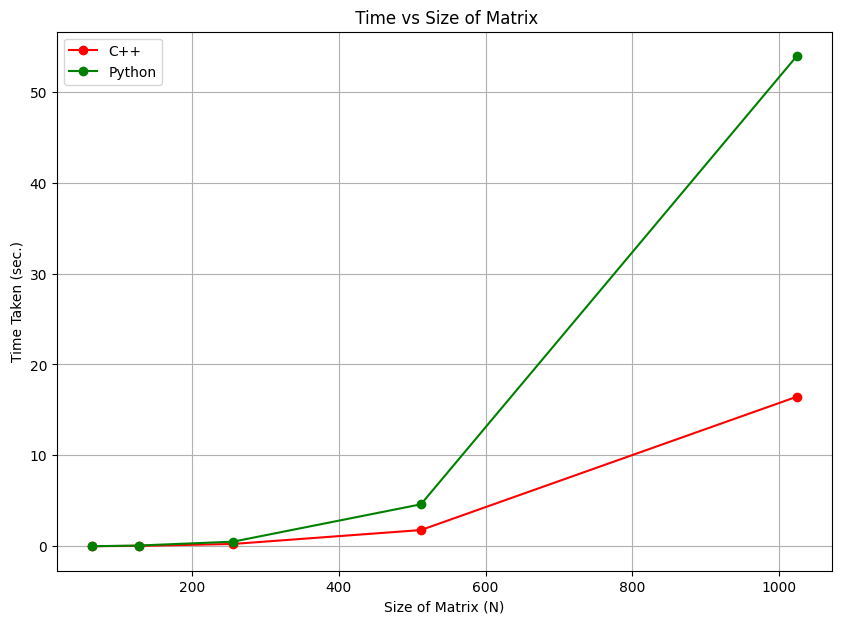

In [29]:
plt.figure(figsize=(10, 7))
plt.title(' Time vs Size of Matrix')
plt.plot(data[1], 'r-o')
plt.plot(datapy[1], 'g-o')
plt.grid()
plt.xlabel('Size of Matrix (N)')
plt.ylabel('Time Taken (sec.)')
plt.legend(['C++', 'Python'])
plt.show()